In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# 1. Veri oluşturma
np.random.seed(0)  # Tekrar üretilebilirlik için
dersler = ['Matematik', 'Fizik', 'Kimya', 'Bilgisayar', 'İstatistik']
ogrenci_sayisi = 100

In [4]:
# Normal dağılıma yakın notlar (ortalama=70, std=15), sınırları 0-100 ile kırp
notlar = np.random.normal(loc=70, scale=15, size=(ogrenci_sayisi, len(dersler)))
notlar = np.clip(notlar, 0, 100)  # 0-100 arasında sınırla
notlar = np.round(notlar).astype(int)  # Tamsayıya yuvarla

In [5]:
# 2. Temel istatistikler
ortalama = np.mean(notlar, axis=0)
medyan = np.median(notlar, axis=0)
std_sapma = np.std(notlar, axis=0)
min_not = np.min(notlar, axis=0)
max_not = np.max(notlar, axis=0)

In [8]:
# 3. Başarılı/Başarısız analizi
gecme_notu = 50
kalan_ogrenci_sayilari = np.sum(notlar < gecme_notu, axis=0)
dersler = ['Matematik', 'Fizik', 'Kimya', 'Bilgisayar', 'İstatistik']
print(f'Matematik:', 'Fizik:', 'Kimya:', 'Bilgisayar:', 'İstatistik:')
print(f'Kalan Öğrenci Sayıları: {kalan_ogrenci_sayilari}')

Matematik: Fizik: Kimya: Bilgisayar: İstatistik:
Kalan Öğrenci Sayıları: [12  8 10  9  5]


In [9]:
# 4. En yüksek notu alan öğrenci
en_yuksek_not = np.max(notlar)
index_en_yuksek = np.unravel_index(np.argmax(notlar), notlar.shape)
print(index_en_yuksek)
ogrenci_en_yuksek = index_en_yuksek[0] + 1  # 1-den başlat
print("Öğrenci sayısı:",ogrenci_en_yuksek)
ders_en_yuksek = dersler[index_en_yuksek[1]]
print("Ders adı:",ders_en_yuksek)

(np.int64(0), np.int64(3))
Öğrenci sayısı: 1
Ders adı: Bilgisayar


In [ ]:
# 5. Korelasyon matrisi
korelasyon_matrisi = np.corrcoef(notlar, rowvar=False)
print(korelasyon_matrisi)

[[ 1.         -0.04944288 -0.09083624  0.07165079 -0.08192453]
 [-0.04944288  1.         -0.10710965  0.05815087  0.14677374]
 [-0.09083624 -0.10710965  1.          0.00684061  0.03870753]
 [ 0.07165079  0.05815087  0.00684061  1.          0.10931874]
 [-0.08192453  0.14677374  0.03870753  0.10931874  1.        ]]


In [10]:
# 6. Özel filtreleme
tum_derslerden_85_ustu = np.all(notlar >= 85, axis=1)
print(tum_derslerden_85_ustu)
en_az_bir_dersten_30_altı = np.any(notlar < 30, axis=1)
print(en_az_bir_dersten_30_altı)
ogrenciler_tum_85_ustu = np.where(tum_derslerden_85_ustu)[0] + 1
print(ogrenciler_tum_85_ustu)
ogrenciler_bir_30_altı = np.where(en_az_bir_dersten_30_altı)[0] + 1
print(ogrenciler_bir_30_altı)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False 

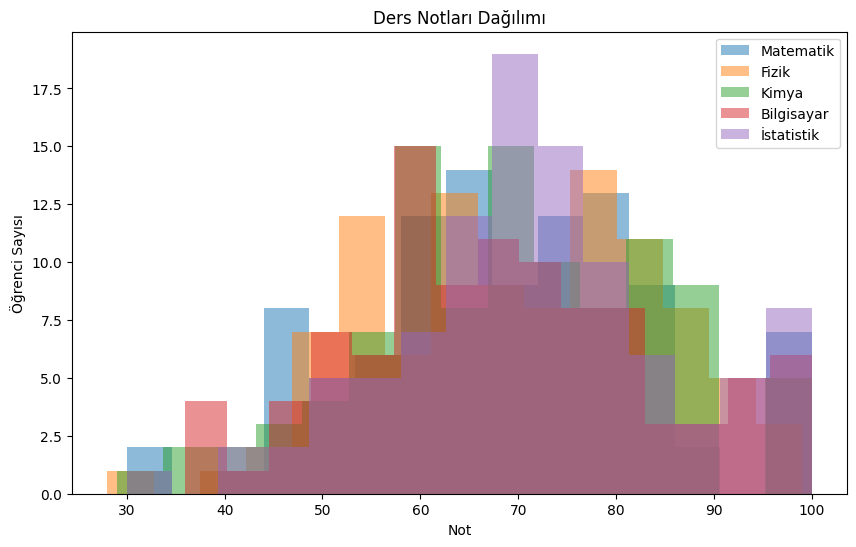

In [ ]:
# 7. Görselleştirme (isteğe bağlı)
plt.figure(figsize=(10,6))
for i, ders in enumerate(dersler):
    plt.hist(notlar[:, i], bins=15, alpha=0.5, label=ders)
plt.title('Ders Notları Dağılımı')
plt.xlabel('Not')
plt.ylabel('Öğrenci Sayısı')
plt.legend()
plt.show()

In [ ]:
# Bonus: Z-skoru hesaplama ve analiz
ortalama_ogrenci = np.mean(notlar, axis=1)
print(ortalama_ogrenci)
# The original 'std_sapma' (course-wise) might have been overwritten.
# We explicitly re-calculate it here to ensure correct dimensions for z-score.
std_sapma = np.std(notlar, axis=0) # Recalculate course-wise std dev, shape (5,)
# print(std_sapma) # Now std_sapma has the correct shape for course-wise normalization.
std_ogrenci = np.std(notlar, axis=1) # This calculates student-wise std dev.
print(std_ogrenci)
# 'ortalama' (ders bazında ortalama) ve 'std_sapma' (ders bazında standart sapma) değişkenleri önceki hücrelerden gelmektedir.
z_skorlari = (notlar - ortalama) / std_sapma  # Ders bazında normalize
print(z_skorlari)

[91.  70.2 78.8 73.2 70.8 74.2 62.  75.4 61.6 61.8 63.4 69.4 60.  62.8
 73.4 62.8 70.6 78.6 77.  79.2 67.2 82.6 80.8 79.4 70.8 77.  65.2 71.2
 75.6 68.  70.2 63.4 73.8 69.6 71.2 66.2 58.  64.4 64.8 84.2 75.2 63.6
 72.  75.8 61.6 68.6 60.6 73.8 64.6 64.8 71.2 62.6 57.  71.6 67.8 69.8
 76.  78.2 69.2 75.4 70.6 62.2 66.  68.6 60.2 75.2 59.4 71.  64.8 71.4
 63.4 61.8 75.8 64.4 69.8 70.6 56.6 63.  64.6 80.8 62.6 70.6 71.4 83.4
 68.4 63.8 64.8 76.  68.4 65.4 72.4 68.4 63.  64.8 64.6 79.2 74.  68.6
 79.2 63. ]
[ 9.1214034   9.64157663  7.4135012  11.49608629 23.37006632 16.84517735
 12.75931033 10.65082156 19.62243614 12.67122725  8.66256313  6.08604962
  9.5289034  10.94349122 12.27354879  4.83321839 17.57953355 15.86946754
  8.64869932  9.66229786 20.27214838 17.48828179 16.86890631  5.98665182
 12.68700122 12.0664825   7.65245059  9.74474217 16.64451862 14.89966443
 13.73171512 12.37093368 16.36337374 15.94490514 12.15565712  8.00999376
 14.25482374 16.48757108 11.23209687 10.85172797  8.6

In [ ]:
# Standart sapma üstü/altında olanlar
ust_sapma_ustu = np.where(z_skorlari > 1)
alt_sapma_alti = np.where(z_skorlari < -1)

# Sınıf sıralaması (genel ortalamaya göre)
sira = np.argsort(ortalama_ogrenci)[::-1] + 1  # Büyükten küçüğe, 1'den başlayarak
ogrenciler_siralama = sira

# Örnek çıktı
print(f'En yüksek not: {en_yuksek_not} Öğrenci: {ogrenci_en_yuksek}, Ders: {ders_en_yuksek}')
print(f'Tüm derslerden 85 üstü alan öğrenciler: {ogrenciler_tum_85_ustu}')
print(f'En az bir dersten 30\'dan düşük alan öğrenciler: {ogrenciler_bir_30_altı}')
print(f'Sınıf sıralamasında ilk 5 öğrenci: {ogrenciler_siralama[:5]}')

En yüksek not: 100 Öğrenci: 1, Ders: Bilgisayar
Tüm derslerden 85 üstü alan öğrenciler: []
En az bir dersten 30'dan düşük alan öğrenciler: [55 86]
Sınıf sıralamasında ilk 5 öğrenci: [ 1 40 84 22 23]
